# CSE 572: Homework 3

This notebook provides a template and starting code to implement the Homework 3 assignment.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

## Real or spurious clusters?

An important question in assessing cluster validity is whether we are finding real patterns in structured data or finding patterns in noise or random data.

In this homework, you are given a dataset from an unknown source with unknown attributes. You are asked to cluster the data into 3 clusters using K-means clustering. Your goal is to evaluate whether the clusters you find in the dataset represent a valid clustering.

You can use any metric we have discussed in class or in the Data Mining textbook, but you must use a statistical test to evaluate validity of the clustering (refer to Lecture 19). Show all of your work and then answer the question in the final Question cell.

In [50]:
import pandas as pd
import numpy as np
np.random.seed(0)

data = pd.read_csv('https://docs.google.com/uc?export=download&id=1CjR6Q6nMN_2pTJJietr07mRjEYYSWR7U', header=None)
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
26,3.092368,5.402461,-8.133775,-0.294511,7.969525,-12.835632,-5.063480,7.273905,8.613952,-3.465857,...,-3.386562,-7.037982,7.132439,1.485860,1.479443,-5.113269,-4.774076,2.689196,-0.904568,-10.652778
86,-1.827800,6.874412,-6.193014,-4.061231,8.434069,-2.325613,-6.572138,2.662216,3.674531,-0.923972,...,-2.786520,-9.698793,15.738431,2.515213,4.275230,-0.569539,-8.697349,5.312718,-2.078858,-6.756235
2,5.118916,9.939231,-5.338687,-1.445761,8.098372,-5.761612,-12.977400,-0.516004,9.223066,-3.431234,...,-5.202991,-8.561189,6.656612,8.321154,3.957509,-5.170569,-5.462176,1.378981,0.207315,-11.161425
55,3.714016,8.423915,3.827518,-4.131552,-2.399190,6.605014,-12.828675,-1.187647,0.935928,0.743484,...,-9.237465,-7.211764,16.679820,-7.001671,3.088515,-7.502164,6.796050,-5.299128,-1.717943,2.469198
75,4.569833,11.060755,-6.875873,-2.357554,15.631446,-3.380032,-5.057848,3.413614,1.210169,3.173396,...,4.201381,-7.076536,1.393941,4.944527,-0.437124,-0.686465,-7.898557,-1.291139,-6.634310,-6.013163
93,-0.258834,9.663264,9.475254,-0.415799,-4.081936,0.444932,-5.416766,-4.677086,1.861590,-0.566723,...,-5.536054,-12.671191,11.588696,-9.697806,-2.560106,-7.002785,8.528511,-0.461722,6.563076,6.630781
16,-8.510063,-1.175450,-8.920655,-6.674918,7.775557,-0.555320,-5.426004,1.575467,0.385196,8.875238,...,-7.258243,-12.391771,6.757994,7.009268,-6.620471,-8.221901,7.553145,-9.769203,8.054948,-8.413713
73,2.415988,6.377045,-5.826130,-2.328841,7.053033,-6.686211,-10.162534,1.710096,5.997351,4.361324,...,3.385755,-6.194881,1.994119,3.453849,6.900653,-3.576021,-6.873806,-1.433298,0.331652,-7.778834
54,-10.554498,-0.520517,-2.549914,-10.942731,5.034579,0.515082,-11.038140,-1.330438,3.045077,2.176546,...,-9.910049,-12.600996,-0.910478,8.410669,-9.573083,-5.953262,10.303521,-3.425547,6.210430,-5.026238
95,-8.379245,4.154273,-7.868257,-9.927669,6.662582,0.764915,-0.324643,2.055360,-2.792492,7.802541,...,-6.386490,-10.713435,-2.536517,11.008383,-8.237495,-3.216780,9.189122,-4.901324,10.148886,-7.039418


In [51]:
# YOUR CODE HERE
random_seed = 0
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeansWith3Clusters = KMeans(n_clusters=3, random_state=random_seed, init="random", n_init=10).fit(data)

print('SSE of Dataset: ', kmeansWith3Clusters.inertia_)
print('Silhouette score of Dataset:', silhouette_score(data, labels=kmeansWith3Clusters.labels_) )

SSE of Dataset:  28019.565034738327
Silhouette score of Dataset: 0.5012850888890975


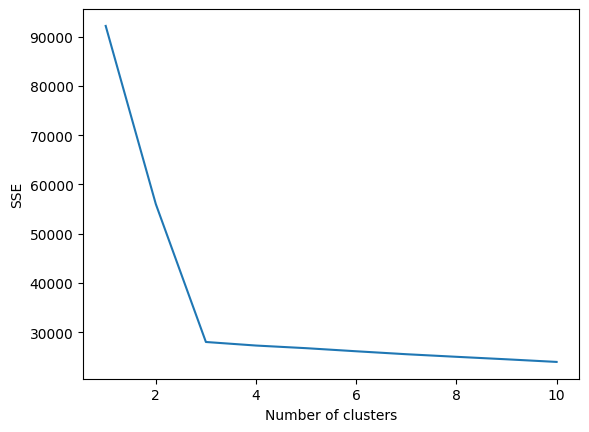

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=random_seed, init="random", n_init=10)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [53]:
n = 500
rand_sse = []
silhouette_score_li = []
min_range = data.min()
max_range = data.max()

for i in range(n):
  np.random.seed(i)
  rand_data = pd.DataFrame()
  for i,col in enumerate(data.columns):
    rand_data[col]=list(np.random.uniform(min_range[i],max_range[i],size=data.shape[0]))
  km = KMeans(n_clusters=k, random_state=random_seed, init="random", n_init=10).fit(rand_data)
  rand_sse.append(km.inertia_)
  silhouette_score_li.append(silhouette_score(rand_data, labels=kmeans.labels_))


(array([  6.,  11.,  47.,  60., 102., 104.,  93.,  46.,  24.,   7.]),
 array([ 94271.80250109,  95310.88180319,  96349.9611053 ,  97389.04040741,
         98428.11970952,  99467.19901163, 100506.27831374, 101545.35761584,
        102584.43691795, 103623.51622006, 104662.59552217]),
 <BarContainer object of 10 artists>)

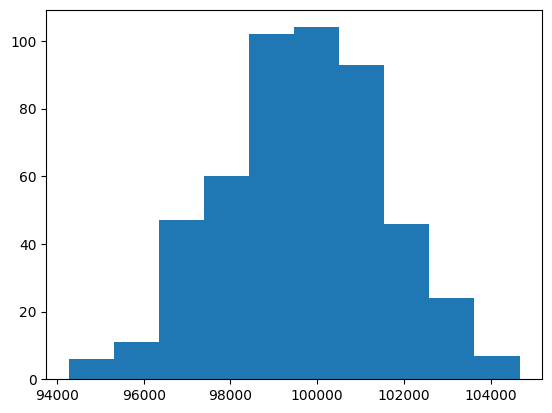

In [54]:
plt.hist(rand_sse)

(array([  1.,   4.,  11.,  29.,  85., 128., 140.,  90.,   8.,   4.]),
 array([-0.07970907, -0.07551286, -0.07131666, -0.06712045, -0.06292425,
        -0.05872804, -0.05453183, -0.05033563, -0.04613942, -0.04194322,
        -0.03774701]),
 <BarContainer object of 10 artists>)

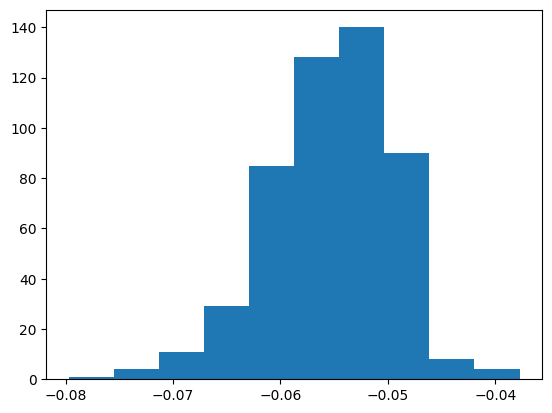

In [55]:
plt.hist(silhouette_score_li)

In [58]:
print('SSE of random data: %f' % (np.mean(rand_sse)))

print('Mean Silhouette score of Test Data', np.mean(silhouette_score_li))

SSE of random data: 99674.481774
Mean Silhouette score of Test Data -0.05529387548306548


**Question: Is your clustering result for the given dataset valid? Explain your answer. Answers must be justified using a statistical test with the chosen cluster validity metric.**

**Answer:**

As we can see, from the above results, SSE of the original data set is 28019.565034738327 and Silhouette Score of the same is 0.5012850888890975, where as the SSE of randomly generated data is 99674.481774 and Silhouette score is -0.05529.

So, to conclude based on the statistical results above, SSE results vary very much from each other, also we know that, lesser the SSE score the better clustering, and similarly, Silhouette Score close to 1 meaning there is better clustering.

We can see that, we have don't have the best clusters but fat better than the randomly generated clusters. So, to conclude, our model performed very well forming clusters and they are REAL.